# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/exchange-rate-history/usd-idr')

In [2]:
url_get

<Response [200]>

'<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>US Dollar to Indonesian Rupiah History - USD to IDR Historical Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="https://www.exchange-rates.org/" />\r\n<meta name="description" content="Explore US Dollar (USD) to Indonesian Rupiah (IDR) historical exchange rates at Exchange-Rates.org. Access detailed data and charts to analyze past currency trends and fluctuations." />\r\n<meta name="keywords" content="" />\r\n<meta property="og:url"         content="https://www.exchange-rates.org/exchange-rate-history/usd-idr">\r\n<meta property="og:type"        con
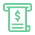
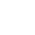
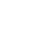

In [3]:
url_get.text

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [4]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>US Dollar to Indonesian Rupiah History - USD to IDR Historical Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html;'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.

In [16]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

To extract the desired information, we need to find the right key using the .find() method. We can explore the HTML structure using .prettify().

*(please change this markdown with your explanation)*

1. [Case Data kurs US Dollar ke rupiah](https://www.exchange-rates.org/exchange-rate-history/usd-idr)

   - Dari halaman tersebut carilah `tanggal`, dan `harga harian`
   - Bualah plot pergerakan kurs USD

2. [Case IMDB Box Office Mojo](https://www.boxofficemojo.com/year/world/)

   - Dari Halaman tersebut carilah kolom `Rank`, `Release Group`, `Worldwide`, `Domestic`, dan `Foreign`
   - Note: kolom `worldwide` merupakan total dari kolom `domestic` dan `foreign`, analisa dan plot bisa disesuaikan.
   - Buatlah plot dari 10 film paling populer di tahun 2024

3. [Case Berita Detik.com tentang Gempa](https://www.detik.com/search/searchall?query=gempa)
   - Dari halaman tersebut carilah `judul`, `berita` , dan `tanggal`
   - Bualah word cloud dari judul. hint: gunakan bantuan `.str.cat()`
   ![alt text](image.png)

In [29]:
table = soup.find('table',attrs={'class':'history-rates-data'})
print(table.prettify()[1:1000])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2025-01-10">
     <span class="nowrap">
      2025-1-10
     </span>
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2025-01-10">
     <span class="nowrap">
      2025-1-10
     </span>
    </a>
   </td>
   <td>
    <span class="w">
     <span class="nowrap">
      1 USD =
     </span>
     <span class="nowrap">
      16,317 IDR
     </span>
    </span>
    <span class="n">
     <span class="nowrap">
      1 USD =
     </span>
     <span class="nowrap">
      16,317 IDR
     </span>
    </span>
   </td>
  </tr>
  <tr class="odd">
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2025-01-09">
     <span class="nowrap">
      2025-1-9
     </span>
    </a>



Next, we need to find the row length.

In [30]:
table.find_all('td',attrs={'class':'w'})
table

<table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
<thead>
<tr>
<th class="ltr-bidi-fix">Date</th>
<th class="ltr-bidi-fix">US Dollar to Indonesian Rupiah</th>
</tr>
</thead>
<tbody>
<tr>
<td>
<a class="w" href="/exchange-rate-history/usd-idr-2025-01-10"><span class="nowrap">2025-1-10</span></a>
<a class="n" href="/exchange-rate-history/usd-idr-2025-01-10"><span class="nowrap">2025-1-10</span></a>
</td>
<td>
<span class="w"><span class="nowrap">1 USD =</span> <span class="nowrap">16,317 IDR</span></span>
<span class="n"><span class="nowrap">1 USD =</span> <span class="nowrap">16,317 IDR</span></span>
</td>
</tr>
<tr class="odd">
<td>
<a class="w" href="/exchange-rate-history/usd-idr-2025-01-09"><span class="nowrap">2025-1-9</span></a>
<a class="n" href="/exchange-rate-history/usd-idr-2025-01-09"><span class="nowrap">2025-1-9</span></a>
</td>
<td>
<span class="w"><span class="nowrap">1 USD =</span> <span class="nowrap">16,254 IDR</span></span>
<span class="n">

In [31]:
table.find_all('tr',attrs={'class':'odd'})


[<tr class="odd">
 <td>
 <a class="w" href="/exchange-rate-history/usd-idr-2025-01-09"><span class="nowrap">2025-1-9</span></a>
 <a class="n" href="/exchange-rate-history/usd-idr-2025-01-09"><span class="nowrap">2025-1-9</span></a>
 </td>
 <td>
 <span class="w"><span class="nowrap">1 USD =</span> <span class="nowrap">16,254 IDR</span></span>
 <span class="n"><span class="nowrap">1 USD =</span> <span class="nowrap">16,254 IDR</span></span>
 </td>
 </tr>,
 <tr class="odd">
 <td>
 <a class="w" href="/exchange-rate-history/usd-idr-2025-01-07"><span class="nowrap">2025-1-7</span></a>
 <a class="n" href="/exchange-rate-history/usd-idr-2025-01-07"><span class="nowrap">2025-1-7</span></a>
 </td>
 <td>
 <span class="w"><span class="nowrap">1 USD =</span> <span class="nowrap">16,224 IDR</span></span>
 <span class="n"><span class="nowrap">1 USD =</span> <span class="nowrap">16,224 IDR</span></span>
 </td>
 </tr>,
 <tr class="odd">
 <td>
 <a class="w" href="/exchange-rate-history/usd-idr-2025-01-0

In [32]:
trial1 = table.find_all('a',attrs={'class':'w'})
trial1

[<a class="w" href="/exchange-rate-history/usd-idr-2025-01-10"><span class="nowrap">2025-1-10</span></a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2025-01-09"><span class="nowrap">2025-1-9</span></a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2025-01-08"><span class="nowrap">2025-1-8</span></a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2025-01-07"><span class="nowrap">2025-1-7</span></a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2025-01-06"><span class="nowrap">2025-1-6</span></a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2025-01-03"><span class="nowrap">2025-1-3</span></a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2025-01-02"><span class="nowrap">2025-1-2</span></a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2025-01-01"><span class="nowrap">2025-1-1</span></a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2024-12-31"><span class="nowrap">2024-12-31</span></a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2

In [42]:
table.find_all('span',attrs={'class':'w'})[0]

<span class="w"><span class="nowrap">1 USD =</span> <span class="nowrap">16,317 IDR</span></span>

In [34]:
table.find_all('a',attrs={'class':'w'})[0].text

'2025-1-10'

In [36]:
table.find_all('a',attrs={'class':'n'})[1].text

'2025-1-9'

In [43]:
table.find_all('span',attrs={'class':'n'})[1].text

'1 USD = 16,254 IDR'

In [44]:
trial = table.find_all('tr',attrs={'class':'odd'})
row_length = len(trial)
row_length

65

Do the scrapping process here (please change this markdown with your explanation). 
dari data yang diperoleh kami mendapatkan tanggal dan nilai tukar perharinya, denan mencari attrib a dan span di dalam tabel

> You can use a for loop to perform the scraping process in various ways depending on the HTML structure of the website you want to scrap and the information you want to retrieve.

In [104]:
temp = []  # Initiating a tuple

for i in range(1, row_length):
    Tanggal = table.find_all('a',attrs={'class':'n'})[i].text
    change_rate = table.find_all('span',attrs={'class':'n'})[i].text
    change_rate = change_rate.strip()
    temp.append((Tanggal,change_rate))
temp = temp[::1]
temp

[('2025-1-9', '1 USD = 16,254 IDR'),
 ('2025-1-8', '1 USD = 16,246 IDR'),
 ('2025-1-7', '1 USD = 16,224 IDR'),
 ('2025-1-6', '1 USD = 16,194 IDR'),
 ('2025-1-3', '1 USD = 16,200 IDR'),
 ('2025-1-2', '1 USD = 16,237 IDR'),
 ('2025-1-1', '1 USD = 16,248 IDR'),
 ('2024-12-31', '1 USD = 16,267 IDR'),
 ('2024-12-30', '1 USD = 16,143 IDR'),
 ('2024-12-27', '1 USD = 16,185 IDR'),
 ('2024-12-26', '1 USD = 16,195 IDR'),
 ('2024-12-25', '1 USD = 16,181 IDR'),
 ('2024-12-24', '1 USD = 16,213 IDR'),
 ('2024-12-23', '1 USD = 16,231 IDR'),
 ('2024-12-20', '1 USD = 16,171 IDR'),
 ('2024-12-19', '1 USD = 16,338 IDR'),
 ('2024-12-18', '1 USD = 16,196 IDR'),
 ('2024-12-17', '1 USD = 16,051 IDR'),
 ('2024-12-16', '1 USD = 16,016 IDR'),
 ('2024-12-13', '1 USD = 16,032 IDR'),
 ('2024-12-12', '1 USD = 15,974 IDR'),
 ('2024-12-11', '1 USD = 15,971 IDR'),
 ('2024-12-10', '1 USD = 15,914 IDR'),
 ('2024-12-9', '1 USD = 15,865 IDR'),
 ('2024-12-6', '1 USD = 15,865 IDR'),
 ('2024-12-5', '1 USD = 15,866 IDR'),
 ('

Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

In [65]:
import pandas as pd

df = pd.DataFrame(temp,columns=('Tanggal','ChangeRate'))
df.head()

,Tanggal,ChangeRate
0,2025-1-9,"1 USD = 16,254 IDR"
1,2025-1-8,"1 USD = 16,246 IDR"
2,2025-1-7,"1 USD = 16,224 IDR"
3,2025-1-6,"1 USD = 16,194 IDR"
4,2025-1-3,"1 USD = 16,200 IDR"


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tanggal     64 non-null     object
 1   ChangeRate  64 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


### Data Cleansing

(please change this markdown with your explanation of what you do for data wrangling)

In [78]:
df['Tanggal']=pd.to_datetime(df['Tanggal'])
df['Tanggal']

0    2025-01-09
1    2025-01-08
2    2025-01-07
3    2025-01-06
4    2025-01-03
        ...    
59   2024-10-18
60   2024-10-17
61   2024-10-16
62   2024-10-15
63   2024-10-14
Name: Tanggal, Length: 64, dtype: datetime64[ns]

In [81]:
df['ChangeRate']=df['ChangeRate'].replace("IDR","",regex=True)
df['ChangeRate']=df['ChangeRate'].replace("1 USD =","",regex=True)
df['ChangeRate']=df['ChangeRate'].replace(",","",regex=True)
df['ChangeRate']=df['ChangeRate'].astype('int64')
df['ChangeRate']

0     16254
1     16246
2     16224
3     16194
4     16200
      ...  
59    15474
60    15525
61    15590
62    15586
63    15578
Name: ChangeRate, Length: 64, dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     64 non-null     datetime64[ns]
 1   ChangeRate  64 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


In [53]:
df['Tanggal']=pd.to_datetime(df['Tanggal'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     64 non-null     datetime64[ns]
 1   ChangeRate  64 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.1+ KB


In [54]:
df.isnull().sum()

Tanggal       0
ChangeRate    0
dtype: int64

In [56]:
df.duplicated().sum()

np.int64(0)

### Data Visualization

(please change this markdown with your explanation of what you do for data wrangling)
Membuat grafik dari perubahan

In [82]:
import matplotlib as plt

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     64 non-null     datetime64[ns]
 1   ChangeRate  64 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


In [94]:
df['Tanggal'].unique()

<DatetimeArray>
['2025-01-09 00:00:00', '2025-01-08 00:00:00', '2025-01-07 00:00:00',
 '2025-01-06 00:00:00', '2025-01-03 00:00:00', '2025-01-02 00:00:00',
 '2025-01-01 00:00:00', '2024-12-31 00:00:00', '2024-12-30 00:00:00',
 '2024-12-27 00:00:00', '2024-12-26 00:00:00', '2024-12-25 00:00:00',
 '2024-12-24 00:00:00', '2024-12-23 00:00:00', '2024-12-20 00:00:00',
 '2024-12-19 00:00:00', '2024-12-18 00:00:00', '2024-12-17 00:00:00',
 '2024-12-16 00:00:00', '2024-12-13 00:00:00', '2024-12-12 00:00:00',
 '2024-12-11 00:00:00', '2024-12-10 00:00:00', '2024-12-09 00:00:00',
 '2024-12-06 00:00:00', '2024-12-05 00:00:00', '2024-12-04 00:00:00',
 '2024-12-03 00:00:00', '2024-12-02 00:00:00', '2024-11-29 00:00:00',
 '2024-11-28 00:00:00', '2024-11-27 00:00:00', '2024-11-26 00:00:00',
 '2024-11-25 00:00:00', '2024-11-22 00:00:00', '2024-11-21 00:00:00',
 '2024-11-20 00:00:00', '2024-11-19 00:00:00', '2024-11-18 00:00:00',
 '2024-11-15 00:00:00', '2024-11-14 00:00:00', '2024-11-13 00:00:00',
 '20

<Axes: title={'center': 'Nilai Tukar Rupiah Terhadap USD'}, xlabel='Tanggal', ylabel='IDR'>

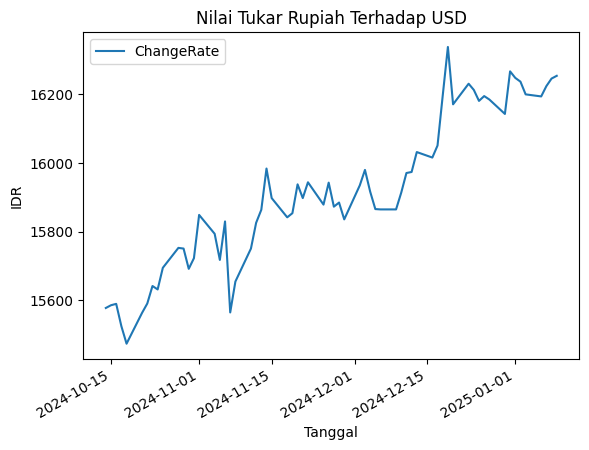

In [105]:

df.plot(kind='line',y = 'ChangeRate', title='Nilai Tukar Rupiah Terhadap USD',ylabel="IDR", xlabel='Tanggal',
        x = 'Tanggal'
        )

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualization.

## Analysis
Makin naik aja ini, Semakin melemah IDR

### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.